# HyP3 deployment notebook - Aleutian island

This is to demonstrate how to use the `asf-search` to get a full time series of GUNWs for one frame.

In [2]:
from pathlib import Path
import numpy as np

from dateutil.parser import parse as parse_date

In [3]:
project_name = 'Aleutian_81'

work_dir = Path.cwd() / project_name
data_dir = work_dir / 'data'

stack_start = parse_date('2014-01-01')
stack_end = parse_date('2023-10-01')
max_temporal_baseline = 370  # days

In [8]:
#SELECT AOI - edit point
point_longitude = 179.6 
point_latitude = 51.91

aoi = 'POINT(%s %s)' % (point_longitude, point_latitude)

In [9]:
aoi

'POINT(179.6 51.91)'

In [11]:
import asf_search as asf
import pandas as pd

search_results = asf.geo_search(
    platform=asf.SENTINEL1,
    intersectsWith=aoi,
    start='2014-04-18',
    end='2023-05-12',
    processingLevel=asf.SLC,
    beamMode=asf.IW,
    relativeOrbit=81,
    flightDirection=asf.ASCENDING,
)

/Users/govorcin/insar/miniconda3/envs/hyp3/lib/python3.9/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)


In [12]:
#GET bperp and btemp from slc stack
baseline_results = asf.baseline_search.stack_from_product(search_results[-1])

columns = list(baseline_results[0].properties.keys()) + ['geometry']
data = [list(scene.properties.values()) + [scene.geometry, ] for scene in baseline_results]

In [14]:
#Create stack dataframe
stack = pd.DataFrame(data, columns=columns)
stack['startTime'] = stack.startTime.apply(parse_date)

In [16]:
stack

,beamModeType,browse,bytes,centerLat,centerLon,faradayRotation,fileID,flightDirection,groupID,granuleType,...,sceneName,sensor,startTime,stopTime,url,fileName,frameNumber,temporalBaseline,perpendicularBaseline,geometry
0,IW,None,3299123733,52.0422,178.5024,None,S1A_IW_SLC__1SSV_20161129T055328_20161129T0554...,ASCENDING,S1A_IWSV_0166_0173_014153_081,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SSV_20161129T055328_20161129T0554...,C-SAR,2016-11-29 05:53:28+00:00,2016-11-29T05:54:03.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,S1A_IW_SLC__1SSV_20161129T055328_20161129T0554...,166,0,0,"{'coordinates': [[[176.345993, 52.886635], [17..."
1,IW,None,3065135042,52.0420,178.5008,None,S1A_IW_SLC__1SSV_20161223T055327_20161223T0554...,ASCENDING,S1A_IWSV_0166_0173_014503_081,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SSV_20161223T055327_20161223T0554...,C-SAR,2016-12-23 05:53:27+00:00,2016-12-23T05:54:03.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,S1A_IW_SLC__1SSV_20161223T055327_20161223T0554...,166,23,-103,"{'coordinates': [[[176.344345, 52.886398], [17..."
2,IW,None,3121426536,52.0419,178.5011,None,S1A_IW_SLC__1SSV_20170116T055325_20170116T0554...,ASCENDING,S1A_IWSV_0166_0173_014853_081,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SSV_20170116T055325_20170116T0554...,C-SAR,2017-01-16 05:53:25+00:00,2017-01-16T05:54:01.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,S1A_IW_SLC__1SSV_20170116T055325_20170116T0554...,166,47,-89,"{'coordinates': [[[176.344666, 52.88652], [177..."
3,IW,None,3265753916,52.0421,178.5023,None,S1A_IW_SLC__1SSV_20170209T055325_20170209T0554...,ASCENDING,S1A_IWSV_0166_0173_015203_081,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SSV_20170209T055325_20170209T0554...,C-SAR,2017-02-09 05:53:25+00:00,2017-02-09T05:54:00.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,S1A_IW_SLC__1SSV_20170209T055325_20170209T0554...,166,71,-28,"{'coordinates': [[[176.346039, 52.886681], [17..."
4,IW,None,3050193052,52.0412,178.5017,None,S1A_IW_SLC__1SSV_20170305T055325_20170305T0554...,ASCENDING,S1A_IWSV_0166_0173_015553_081,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SSV_20170305T055325_20170305T0554...,C-SAR,2017-03-05 05:53:25+00:00,2017-03-05T05:54:00.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,S1A_IW_SLC__1SSV_20170305T055325_20170305T0554...,166,95,-112,"{'coordinates': [[[176.345413, 52.885578], [17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,IW,None,5407753287,52.0393,178.5062,None,S1A_IW_SLC__1SDV_20220923T055405_20220923T0554...,ASCENDING,S1A_IWDV_0166_0173_045128_081,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SDV_20220923T055405_20220923T0554...,C-SAR,2022-09-23 05:54:05+00:00,2022-09-23T05:54:40.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,S1A_IW_SLC__1SDV_20220923T055405_20220923T0554...,166,2124,92,"{'coordinates': [[[176.350281, 52.883633], [17..."
171,IW,None,5014335528,52.0403,178.5027,None,S1A_IW_SLC__1SDV_20221005T055405_20221005T0554...,ASCENDING,S1A_IWDV_0166_0173_045303_081,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SDV_20221005T055405_20221005T0554...,C-SAR,2022-10-05 05:54:05+00:00,2022-10-05T05:54:41.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,S1A_IW_SLC__1SDV_20221005T055405_20221005T0554...,166,2136,-106,"{'coordinates': [[[176.346664, 52.884575], [17..."
172,IW,None,5324812679,52.0401,178.5017,None,S1A_IW_SLC__1SDV_20221029T055406_20221029T0554...,ASCENDING,S1A_IWDV_0166_0173_045653_081,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SDV_20221029T055406_20221029T0554...,C-SAR,2022-10-29 05:54:06+00:00,2022-10-29T05:54:41.000Z,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,S1A_IW_SLC__1SDV_20221029T055406_20221029T0554...,166,2160,-126,"{'coordinates': [[[176.345551, 52.884556], [17..."
173,IW,None,5681202975,52.0412,178.5036,None,S1A_IW_SLC__1SDV_20221110T055405_20221110T0554...,ASCENDING,S1A_IWDV_0166_0173_045828_081,SENTINEL_1A_FRAME,...,S1A_IW_SLC__1SDV_20221110T055405_20221110T0554...,C-SAR,2022-11-10 05:54:05+00:00,2022-11-10T05:54:40.000Z,https://datapool.

In [21]:
stack.startTime.min(), stack.startTime.max() 

(Timestamp('2016-11-29 05:53:28+0000', tz='tzutc()'),
 Timestamp('2022-11-22 05:54:05+0000', tz='tzutc()'))

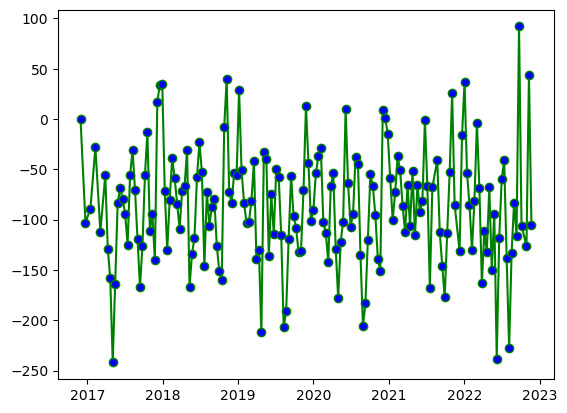

In [23]:
from matplotlib import pyplot as plt
#%matplotlib qt
%matplotlib inline
plt.plot(stack['startTime'], stack['perpendicularBaseline'], '-o', 
         color='green', markerfacecolor='blue')

In [24]:
## GET sequential pairs
sbas_pairs = set()
for reference, rt, pb, date1 in stack.loc[::-1, ['sceneName', 
                                             'temporalBaseline',
                                             'perpendicularBaseline',
                                             'startTime']].itertuples(index=False):
    
    sequential_ix = stack.temporalBaseline[stack.temporalBaseline - rt > 0].index[:3]
    secondaries = stack.loc[sequential_ix]
    btemp = secondaries.temporalBaseline - rt

    for secondary, date2, bt12, pb12 in zip(secondaries.sceneName, 
                                      secondaries.startTime,
                                      btemp,
                                      secondaries.perpendicularBaseline):
        sbas_pairs.add((reference, secondary, date1, date2, pb, pb12, bt12))

In [25]:
#Get annual pairs
for reference, rt, pb, date1 in stack.loc[::-1, ['sceneName', 
                                                 'temporalBaseline',
                                                 'perpendicularBaseline',
                                                  'startTime']].itertuples(index=False):

    secondaries = stack.loc[
        (stack.sceneName != reference)
        & (stack.temporalBaseline - rt <= 370)
        & (stack.temporalBaseline - rt > 355)
    ]
    btemp = secondaries.temporalBaseline - rt
    
    for secondary, date2, bt12, pb12 in zip(secondaries.sceneName, 
                                secondaries.startTime,
                                btemp,
                                secondaries.perpendicularBaseline):
        sbas_pairs.add((reference, secondary, date1, date2, pb, pb12, bt12))

In [26]:
df_columns = ['reference', 'secondary', 'reference_date',
              'secondary_date', 'bperp1','bperp2', 'btemp']

df_pairs = pd.DataFrame(sbas_pairs, columns=df_columns)

In [27]:
df_pairs.sort_values('reference_date')

,reference,secondary,reference_date,secondary_date,bperp1,bperp2,btemp
542,S1A_IW_SLC__1SSV_20161129T055328_20161129T0554...,S1A_IW_SLC__1SDV_20171124T055334_20171124T0554...,2016-11-29 05:53:28+00:00,2017-11-24 05:53:34+00:00,0,-140,360
266,S1A_IW_SLC__1SSV_20161129T055328_20161129T0554...,S1A_IW_SLC__1SSV_20170209T055325_20170209T0554...,2016-11-29 05:53:28+00:00,2017-02-09 05:53:25+00:00,0,-28,71
128,S1A_IW_SLC__1SSV_20161129T055328_20161129T0554...,S1A_IW_SLC__1SSV_20170116T055325_20170116T0554...,2016-11-29 05:53:28+00:00,2017-01-16 05:53:25+00:00,0,-89,47
469,S1A_IW_SLC__1SSV_20161129T055328_20161129T0554...,S1A_IW_SLC__1SSV_20161223T055327_20161223T0554...,2016-11-29 05:53:28+00:00,2016-12-23 05:53:27+00:00,0,-103,23
395,S1A_IW_SLC__1SSV_20161223T055327_20161223T0554...,S1A_IW_SLC__1SSV_20170209T055325_20170209T0554...,2016-12-23 05:53:27+00:00,2017-02-09 05:53:25+00:00,-103,-28,48
...,...,...,...,...,...,...,...
417,S1A_IW_SLC__1SDV_20221005T055405_20221005T0554...,S1A_IW_SLC__1SDV_20221110T055405_20221110T0554...,2022-10-05 05:54:05+00:00,2022-11-10 05:54:05+00:00,-106,44,36
563,S1A_IW_SLC__1SDV_20221005T055405_20221005T0554...,S1A_IW_SLC__1SDV_20221029T055406_20221029T0554...,2022-10-05 05:54:05+00:00,2022-10-29 05:54:06+00:00,-106,-126,24
421,S1A_IW_SLC__1SDV_20221029T055406_20221029T0554...,S1A_IW_SLC__1SDV_20221110T055405_20221110T0554...,2022-10-29 05:54:06+00:00,2022-11-10 05:54:05+00:00,-126,44,12
509,S1A_IW_SLC__1SDV_20221029T055406_20221029T0554...,S1A_IW_SLC__1SDV_20221122T055405_20221122T0554...,2022-10-29 05:54:06+00:00,2022-11-22 05:54:05+00:00,-126,-105,24


In [29]:
drop_ix = df_pairs.loc[df_pairs.btemp > 320][
    df_pairs.loc[df_pairs.btemp > 320].reference_date.dt.month.isin([6, 7, 8, 9, 10]) == False].index

In [30]:
df_pairs = df_pairs.drop(index=drop_ix)

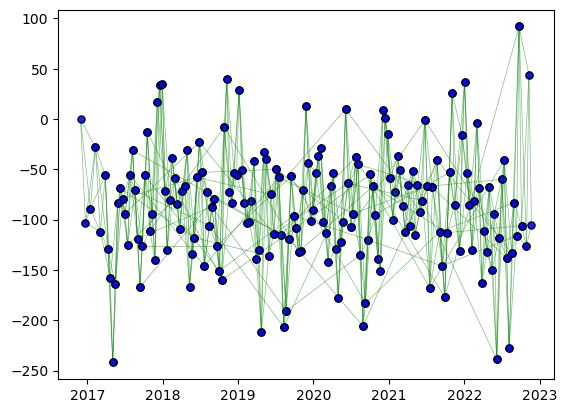

In [32]:
%matplotlib inline
figure, ax = plt.subplots(1)
graph = ax.plot([df_pairs.reference_date, df_pairs.secondary_date], 
                [df_pairs.bperp1, df_pairs.bperp2], 
                '-o', color='green', markerfacecolor='blue', markeredgecolor='black', 
                markersize=5, linewidth=0.5, alpha=0.5)

In [33]:
len(sbas_pairs)

662

# Visualize a Date Graph from Time Series

We can put this into a network Directed Graph and use some simple network functions to check connectivity.


<function matplotlib.pyplot.show(close=None, block=None)>

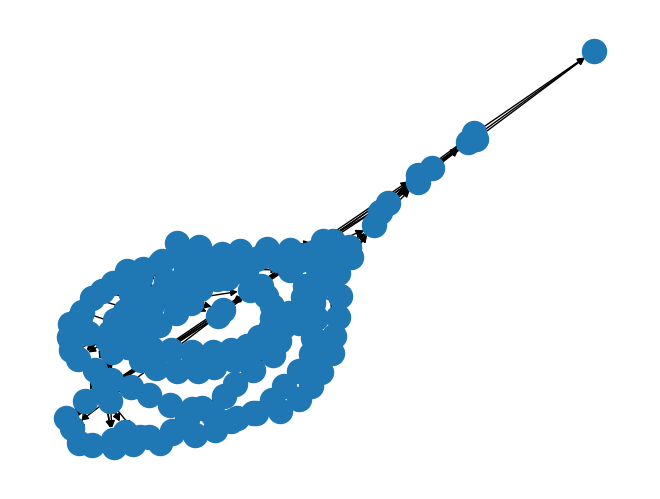

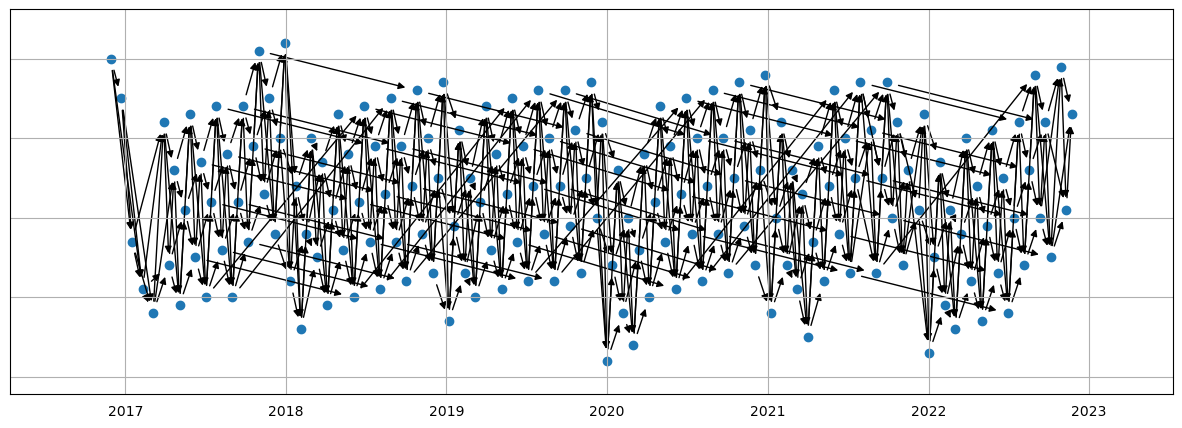

In [34]:
import networkx as nx
unique_dates = df_pairs.reference_date.tolist() + df_pairs.secondary_date.tolist()
unique_dates = sorted(list(set(unique_dates)))

# initiate and plot date notes
date2node = {date: k for (k, date) in enumerate(unique_dates)}
node2date = {k: date for (date, k) in date2node.items()}

# connectivity network Directed Graph
G = nx.DiGraph()
edges = [(date2node[ref_date], date2node[sec_date]) 
         for (ref_date, sec_date) in zip(df_pairs.reference_date, df_pairs.secondary_date)]
G.add_edges_from(edges)
nx.draw(G)

# Time Series Graph
fig, ax = plt.subplots(figsize=(15, 5))

increment = [date.month + date.day for date in unique_dates]

# source: https://stackoverflow.com/a/27852570
scat = ax.scatter(unique_dates, increment)
position = scat.get_offsets().data

pos = {date2node[date]: position[k] for (k, date) in enumerate(unique_dates)}
nx.draw_networkx_edges(G, pos=pos, ax=ax)
ax.grid('on')
ax.tick_params(axis='x',
               which='major',
               labelbottom=True,
               labelleft=True)
ymin, ymax = ax.get_ylim()
plt.show

# Check Hyp3 Account


missing part to check existing pairs in s3 bucket 

In [333]:
import hyp3_sdk as sdk
DEPLOY_URL = 'https://hyp3-a19-jpl.asf.alaska.edu'

hyp3 = sdk.HyP3(DEPLOY_URL)

In [334]:
jobs = []
job_type = 'INSAR_ISCE'
for reference, secondary in df_pairs.loc[::-1, ['reference', 'secondary']].itertuples(index=False):
    jobs += [{'name': project_name,
              'job_type': job_type,
              'job_parameters': {'granules': [reference],
                                 'secondary_granules': [secondary]}}]

In [335]:
jobs[0]

{'name': 'Aleutian_81',
 'job_type': 'INSAR_ISCE',
 'job_parameters': {'granules': ['S1A_IW_SLC__1SDV_20220923T055405_20220923T055440_045128_056498_93FF'],
  'secondary_granules': ['S1A_IW_SLC__1SDV_20221110T055405_20221110T055440_045828_057B73_9AE6']}}

In [336]:
print('##########################################')
print('Existing HyP3 jobs:')
j = hyp3.find_jobs()
print(j)
print(f'\nExisting HyP3 jobs for {project_name}:')
j = hyp3.find_jobs(name=project_name)
print(j)

##########################################
Existing HyP3 jobs:
4894 HyP3 Jobs: 3419 succeeded, 1475 failed, 0 running, 0 pending.

Existing HyP3 jobs for Aleutian_81:
0 HyP3 Jobs: 0 succeeded, 0 failed, 0 running, 0 pending.


In [338]:
from tqdm import tqdm
SUBMIT = True

if SUBMIT:
    #UNCOMMENT TO SUBMIT
    prepared_jobs = jobs
    submitted_jobs = sdk.Batch()
    for batch in tqdm(sdk.util.chunk(prepared_jobs), 
                      total=len(list(sdk.util.chunk(prepared_jobs)))):
        
        submitted_jobs += hyp3.submit_prepared_jobs(batch)

100%|███████████████████████████████████████████████████████████████████████████| 3/3 [00:21<00:00,  7.02s/it]


In [349]:
print(f'\nExisting HyP3 jobs for {project_name}:')
j = hyp3.find_jobs(name=project_name)
print(j)


Existing HyP3 jobs for Aleutian_81:
576 HyP3 Jobs: 0 succeeded, 576 failed, 0 running, 0 pending.
